In [269]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("karanguptaofiicial/telco-customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\karanguptaofiicial\telco-customer-churn-dataset\versions\1


In [270]:
df = pd.read_csv(r'c:\Users\HP\.cache\kagglehub\datasets\karanguptaofiicial\telco-customer-churn-dataset\versions\1\Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [271]:
df.shape

(7043, 21)

In [272]:
df.isnull().sum().sum()

np.int64(0)

In [273]:
df.drop(['customerID'],axis=1,inplace=True)

In [274]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [275]:
cols = df.select_dtypes(include='object').columns

In [276]:
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for c in cols:
    df[c] = le.fit_transform(df[c])

In [277]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


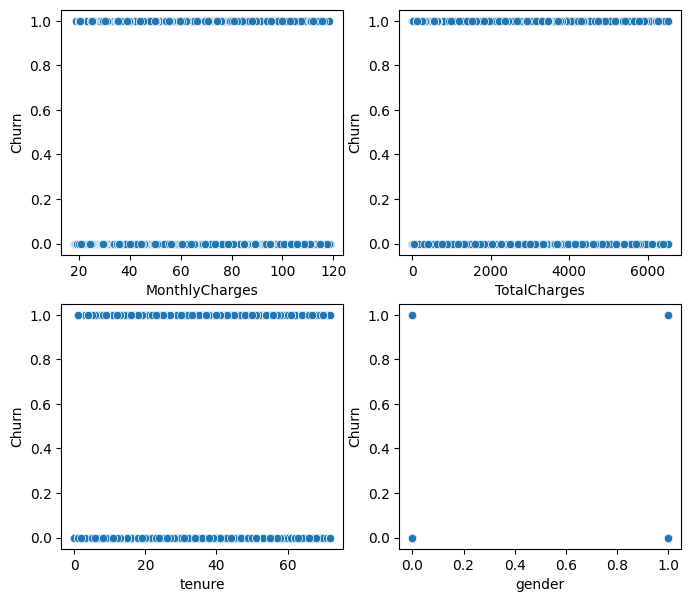

In [278]:
plt.figure(figsize=(8,7))
plt.subplot(2,2,1)
sns.scatterplot(x='MonthlyCharges',y='Churn',data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='TotalCharges',y='Churn',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='tenure',y='Churn',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='gender',y='Churn',data=df)

plt.show()

In [279]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

In [280]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [281]:
#scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [282]:
# MODEL TRAINING

In [283]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000,class_weight='balanced')
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [284]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(75.58205565019875, 73.81673608481636)

In [285]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


In [286]:
gnb.score(x_test,y_test),gnb.score(x_train,y_train)

(0.7552526973310619, 0.7540704278682318)

In [287]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)  #pre-pruning
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [288]:
dt.score(x_test,y_test)*100,dt.score(x_train,y_train)*100

(79.21635434412265, 79.8750473305566)

In [289]:
#post-pruning
for i in range(1,7):
    dt1 = DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train,y_train)
    print(i,dt1.score(x_train,y_train),dt1.score(x_test,y_test))

1 0.7368421052631579 0.7279954571266326
2 0.7434683831881863 0.7393526405451448
3 0.7849299507762211 0.7751277683134583
4 0.7902309731162438 0.7864849517319704
5 0.798750473305566 0.7921635434412265
6 0.8084059068534646 0.7876206700738216


In [290]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=5,criterion='gini')
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [291]:
rf.score(x_test,y_test)*100,rf.score(x_train,y_train)*100

(79.1595684270301, 80.6134040136312)

In [292]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300, max_features=2)
gbc.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [293]:
gbc.score(x_test,y_test)*100,gbc.score(x_train,y_train)*100

(80.23850085178876, 82.43089738735327)

In [294]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=2, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [295]:
xgb.score(x_test,y_test)*100,xgb.score(x_train,y_train)*100


(80.29528676888131, 81.74933737220749)

In [296]:
models = {
    "Logistic Regression": lr,
    "Gaussian NB": gnb,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gbc,
    "XGBoost": xgb
}

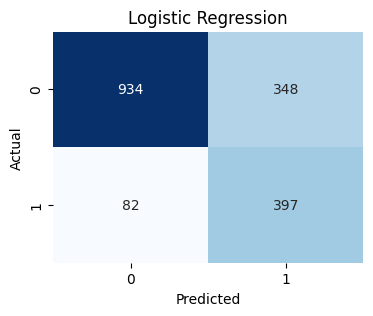

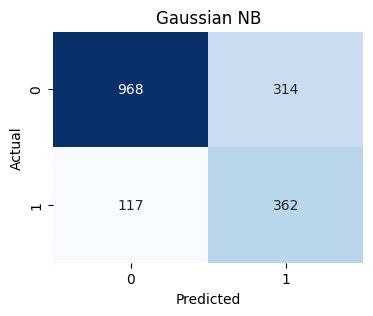

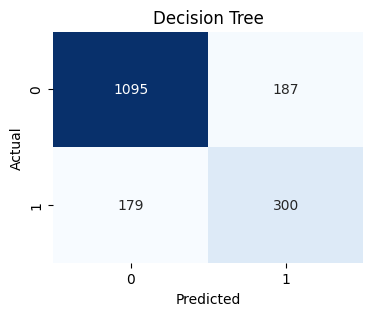

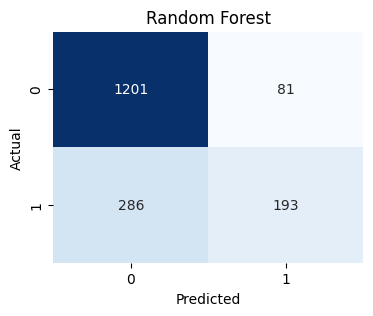

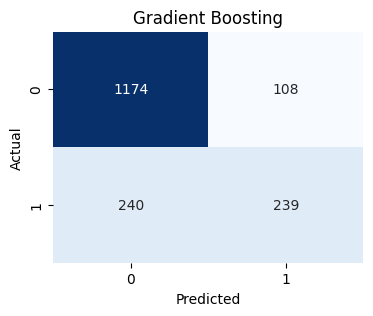

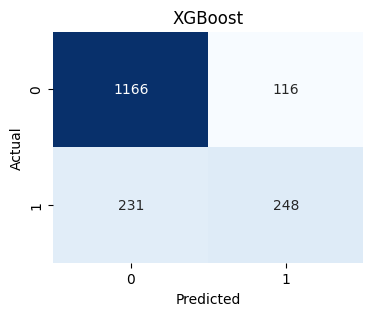

In [299]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

confusion_m = {}
for name,model in models.items():
    y_pred = model.predict(x_test)
    confusion_m[name] = confusion_matrix(y_test, y_pred)


for name,cm in confusion_m.items():
    plt.figure(figsize=(4,3))
    sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
   


In [300]:
#
accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.8029528676888131,
 0.6813186813186813,
 0.5177453027139874,
 0.5883748517200474)

In [304]:
result = []
for name,model in models.items():
    y_pred = model.predict(x_test)

    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    result.append([name, accuracy, precision, recall, f1])

In [309]:
results_df = pd.DataFrame(result,columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
results_df.head()


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.755821,0.532886,0.828810,0.648693
1,Gaussian NB,0.755253,0.535503,0.755741,0.626840
2,Decision Tree,0.792164,0.616016,0.626305,0.621118
3,Random Forest,0.791596,0.704380,0.402923,0.512616
4,Gradient Boosting,0.802385,0.688761,0.498956,0.578692


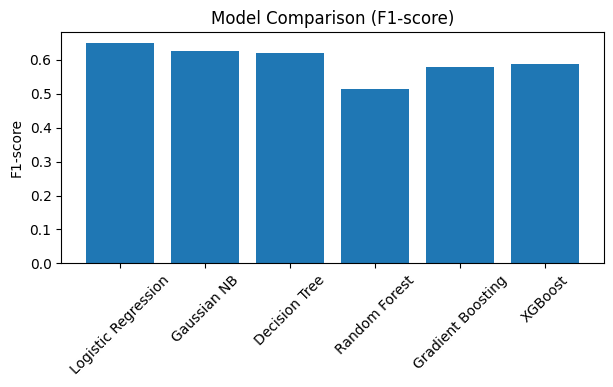

In [323]:
plt.figure(figsize=(7,3))
plt.bar(results_df["Model"],results_df["F1-score"])
plt.xticks(rotation=45)
plt.title("Model Comparison (F1-score)")
plt.ylabel("F1-score")
plt.show()